# Центральная предельная теорема своими руками

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as sts
%matplotlib inline

## Распределение хи-квадрат

Получить представление про распределение хи-квадрат можно, например, [здесь](https://ru.wikipedia.org/wiki/Распределение_хи-квадрат)

Математическое ожидание распределения $\chi^2$ с $k$ степенями свободы: $E[x] = k$ 

Дисперсия распределения $\chi^2$ с $k$ степенями свободы: $D[x] = 2k$ 

В расчётах будем использовать $k = 4$. Вычислим математическое ожидание и дисперсию:

In [36]:
# Вычислим математическое ожидание и дисперсию для k = 4
k = 4.
E = k
D = 2*k
print E, D

4.0 8.0


Таким образом, $$E[x] = 4,$$ $$D[x] = 8$$

Сгенерируем выборку объёмом 1000 из распределения $\chi^2$ с четырьмя степенями свободы.

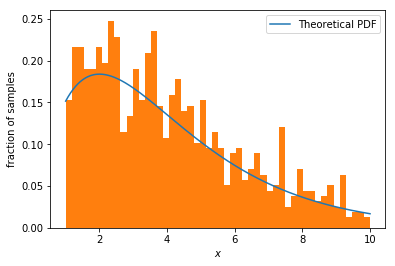

In [37]:
# Задаём функцию
chi_sq = sts.chi2(k)

# Генерируем выборку
sample = chi_sq.rvs(1000)

# Задаём массив точек для построения графика
x = np.linspace(1, 10, 1000)

# Вычисляем значение плотности распределения
pdf = chi_sq.pdf(x)

# Строим график теоретической плотности распределения
plt.plot(x, pdf, label='Theoretical PDF')

# Строим гистограмму выборки
plt.hist(sample, bins = 50, range=(1,10), normed=True)

plt.ylabel('fraction of samples')
plt.xlabel('$x$')
plt.legend(loc='best')

## Оценка распределения выборочного среднего при разных объёмах выборок

### при n = 3

Сгенерируем 1000 выборок объёмом 3 из распределения $\chi^2$ с четырьмя степенями свободы и построим гистограмму распределения их выборочных средних.

При этом параметры нормального распределения, описывающего выборку, можно вычислить по формулам: $$\mu = E[x],$$ $$\sigma = \sqrt{\frac{D[x]}{n}}$$

Для $n = 3$: $$\mu = 4, \sigma \approx 1.63$$

Математическое ожидание и среднеквадратическое отклонение: 4.0 1.63299316186


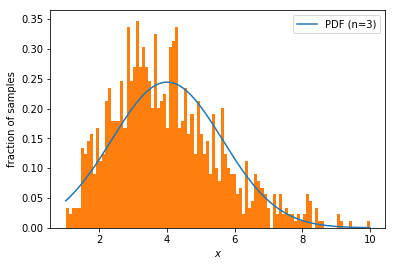

In [38]:
n = 3
samples = np.array([]) # Массив выборочных средних выборок объёма 3

for i in range(0, 1000):
    samplei = chi_sq.rvs(n)
    mean = sum(samplei)/n # Вычисляем выборочное среднее
    samples = np.append(samples, mean) # Добавляем выборочное среднее в массив

# Определим параметры нормального распределения,
# описывающего массив выборочных средних при n = 3

# Математическое ожидание
E3 = E
# Дисперсия
D3 = D / n
# Среднеквадратическое отклонение
sigma3 = math.sqrt(D3)

print 'Математическое ожидание и среднеквадратическое отклонение:', E3, sigma3

# Задаём нормальное распределение
norm3 = sts.norm(E3, sigma3)

# Вычисляем значение плотности распределения
pdf3 = norm3.pdf(x)

# Строим график плотности распределения
plt.plot(x, pdf3, label='PDF (n=3)')

# Строим гистограмму выборки
plt.hist(samples, bins = 100, range=(1, 10), normed=True)

plt.ylabel('fraction of samples')
plt.xlabel('$x$')
plt.legend(loc='best')

### при n = 7

Сгенерируем 1000 выборок объёмом 7 из распределения $\chi^2$ с четырьмя степенями свободы и построим гистограмму распределения их выборочных средних.

При этом параметры нормального распределения, описывающего выборку, можно вычислить по формулам: $$\mu = E[x],$$ $$\sigma = \sqrt{\frac{D[x]}{n}}$$

Для $n = 7$: $$\mu = 4, \sigma \approx 1.07$$

Математическое ожидание и среднеквадратическое отклонение: 4.0 1.06904496765


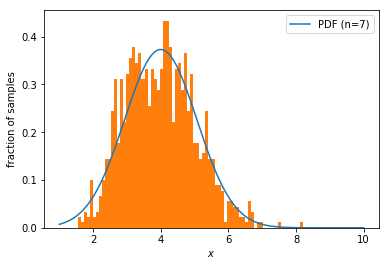

In [39]:
n = 7
samples = np.array([]) # Массив выборочных средних выборок объёма 7

for i in range(0, 1000):
    samplei = chi_sq.rvs(n)
    mean = sum(samplei)/n # Вычисляем выборочное среднее
    samples = np.append(samples, mean) # Добавляем выборочное среднее в массив

# Определим параметры нормального распределения,
# описывающего массив выборочных средних при n = 7

# Математическое ожидание
E7 = E
# Дисперсия
D7 = D / n
# Среднеквадратическое отклонение
sigma7 = math.sqrt(D7)

print 'Математическое ожидание и среднеквадратическое отклонение:', E7, sigma7

# Задаём нормальное распределение
norm7 = sts.norm(E7, sigma7)

# Вычисляем значение плотности распределения
pdf7 = norm7.pdf(x)

# Строим график плотности распределения
plt.plot(x, pdf7, label='PDF (n=7)')

# Строим гистограмму выборки
plt.hist(samples, bins = 100, range=(1, 10), normed=True)

plt.ylabel('fraction of samples')
plt.xlabel('$x$')
plt.legend(loc='best')

### при n = 50

Сгенерируем 1000 выборок объёмом 50 из распределения $\chi^2$ с четырьмя степенями свободы и построим гистограмму распределения их выборочных средних.

При этом параметры нормального распределения, описывающего выборку, можно вычислить по формулам: $$\mu = E[x],$$ $$\sigma = \sqrt{\frac{D[x]}{n}}$$

Для $n = 50$: $$\mu = 4, \sigma \approx 0.4$$

Математическое ожидание и среднеквадратическое отклонение: 4.0 0.4


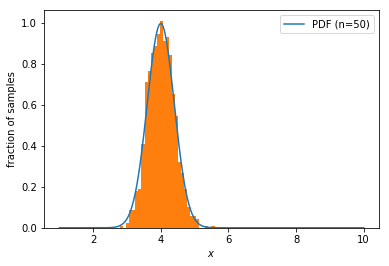

In [40]:
n = 50
samples = np.array([]) # Массив выборочных средних выборок объёма 50

for i in range(0, 1000):
    samplei = chi_sq.rvs(n)
    mean = sum(samplei)/n # Вычисляем выборочное среднее
    samples = np.append(samples, mean) # Добавляем выборочное среднее в массив

# Определим параметры нормального распределения,
# описывающего массив выборочных средних при n = 50

# Математическое ожидание
E50 = E
# Дисперсия
D50 = D / n
# Среднеквадратическое отклонение
sigma50 = math.sqrt(D50)

print 'Математическое ожидание и среднеквадратическое отклонение:', E50, sigma50

# Задаём нормальное распределение
norm50 = sts.norm(E50, sigma50)

# Вычисляем значение плотности распределения
pdf50 = norm50.pdf(x)

# Строим график плотности распределения
plt.plot(x, pdf50, label='PDF (n=50)')

# Строим гистограмму выборки
plt.hist(samples, bins = 100, range=(1, 10), normed=True)

plt.ylabel('fraction of samples')
plt.xlabel('$x$')
plt.legend(loc='best')

### при n = 500

Сгенерируем 1000 выборок объёмом 500 из распределения $\chi^2$ с четырьмя степенями свободы и построим гистограмму распределения их выборочных средних.

При этом параметры нормального распределения, описывающего выборку, можно вычислить по формулам: $$\mu = E[x],$$ $$\sigma = \sqrt{\frac{D[x]}{n}}$$

Для $n = 500$: $$\mu = 4, \sigma \approx 0.13$$

Математическое ожидание и среднеквадратическое отклонение: 4.0 0.126491106407


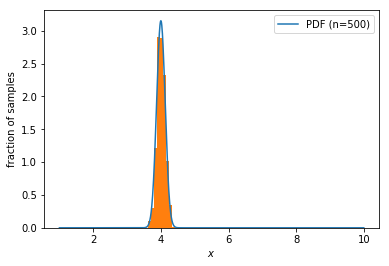

In [41]:
n = 500
samples = np.array([]) # Массив выборочных средних выборок объёма 50

for i in range(0, 1000):
    samplei = chi_sq.rvs(n)
    mean = sum(samplei)/n # Вычисляем выборочное среднее
    samples = np.append(samples, mean) # Добавляем выборочное среднее в массив

# Определим параметры нормального распределения,
# описывающего массив выборочных средних при n = 50

# Математическое ожидание
E500 = E
# Дисперсия
D500 = D / n
# Среднеквадратическое отклонение
sigma500 = math.sqrt(D500)

print 'Математическое ожидание и среднеквадратическое отклонение:', E500, sigma500

# Задаём нормальное распределение
norm500 = sts.norm(E500, sigma500)

# Вычисляем значение плотности распределения
pdf500 = norm500.pdf(x)

# Строим график плотности распределения
plt.plot(x, pdf500, label='PDF (n=500)')

# Строим гистограмму выборки
plt.hist(samples, bins = 100, range=(1, 10), normed=True)

plt.ylabel('fraction of samples')
plt.xlabel('$x$')
plt.legend(loc='best')

## Выводы

В процессе работы были сгенерированы выборки объёмом 1000 для $n = 3, 7, 50, 500$, рассчитаны и занесены в массивы их выборочные средние, по значениям из массивов были построены гистограммы распределения выборочных средних. Рассчитаны параметры для аппроксимации нормальным распределением выборки выборочных средних для каждого значения $n$ и построены графики плотности аппроксимирующего нормального распределения для каждого значения $n$.

По полученным графикам можно сделать следующие выводы. Точность аппроксимации выборочного среднего значения непрерывной случайной величины, описываемой распределением $\chi^2$, при увеличении $n$ повышается. В силу несимметричности плотности распределения $\chi^2$ относительно математического ожидания (даже при $k = 4$) при $n = 3, 7$ наблюдаются пики на гистограмме левее математического ожидания нормального распределения. Их можно сгладить увеличением $n$, например, в данном случае качество аппроксимации выборочного среднего значительно повышается при $n = 50$ или при $n = 500$.